In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

In [33]:
### describe_patents_citaions.dta
df = pd.read_stata('C:/Users/10345/OneDrive/博士/IPEN_5140/replication1/replication/replication_package/descriptives/data__patent_citations.dta')

In [34]:
### regression_patents_citaions.dta
df1 = pd.read_stata('C:/Users/10345/OneDrive/博士/IPEN_5140/replication1/replication/replication_package/regressions/data__patent_citations.dta')

In [35]:
df1.shape

(162627, 108)

In [36]:
df.shape

(242614, 12)

In [6]:
df.describe()

,patent_id,uspto_class,weapons_class,filing_date,filing_year,grant_date,grant_year,num_inventors,num_pages,num_drawings,...,osrd_secret_1945,osrd_secrecy_eval_1941,osrd_secrecy_eval_1942,osrd_secrecy_eval_1943,osrd_secrecy_eval_1944,osrd_secrecy_eval_1945,assignee_class,class_yr,assignee_class_yr,post1947_lag
count,1.626270e+05,162627.000000,2315.0,162627,162627.000000,162627,162627.000000,162422.000000,162627.000000,162627.000000,...,162627.000000,162627.000000,162627.000000,162627.000000,162627.000000,162627.000000,162578.000000,162627.000000,162578.000000,162627.000000
mean,2.384748e+06,254.461473,1.0,1942-12-06 08:11:53.505137536,1942.432062,1945-11-06 21:30:58.075227520,1945.348386,1.199930,5.571055,1.865594,...,0.001654,0.011695,0.020046,0.018109,0.011019,0.003388,44185.609375,1047.632539,56373.460938,0.596399
min,2.212378e+06,2.000000,1.0,1940-07-01 00:00:00,1940.000000,1940-08-20 00:00:00,1940.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.333632e+06,114.000000,1.0,1941-07-23 00:00:00,1941.000000,1943-11-09 00:00:00,1943.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21902.250000,450.000000,28367.250000,0.000000
50%,2.379512e+06,241.000000,1.0,1942-11-17 00:00:00,1942.000000,1945-07-03 00:00:00,1945.000000,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42366.500000,1025.000000,54813.500000,0.000000
75%,2.424168e+06,384.000000,1.0,1944-04-17 00:00:00,1944.000000,1947-07-15 00:00:00,1947.000000,1.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67229.750000,1620.000000,85193.750000,0.449008
max,4.178474e+06,850.000000,1.0,1945-06-30 00:00:00,1945.000000,1979-12-11 00:00:00,1979.000000,9.000000,395.000000,174.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88544.000000,2330.000000,112409.000000,32.856949
std,7.922818e+04,158.313934,0.0,NaN,1.566552,NaN,2.680938,0.473887,4.533712,2.141976,...,0.040637,0.107512,0.140158,0.133346,0.104392,0.058109,26337.898438,658.209114,33099.453125,1.415651


In [4]:
df.columns

Index(['patent_id', 'uspto_class', 'filing_year', 'grant_year', 'class_yr',
       'secrecy_eval', 'secret', 'fcites', 'fciters', 'fclasses', 'fother',
       'fself'],
      dtype='object')

In [8]:
df['filing_year'].value_counts()

filing_year
1939    40739
1940    40361
1945    36363
1941    35206
1944    31962
1942    29524
1943    28459
Name: count, dtype: int64

In [45]:
# Descriptive statistics to compare the two distributions
secret_patents = df[df['secret'] == 1]['fcites']
non_secret_patents = df[df['secret'] == 0]['fcites']

# Calculate summary statistics
secret_stats = secret_patents.describe()
non_secret_stats = non_secret_patents.describe()

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(secret_patents, non_secret_patents, equal_var=False)

secret_stats, non_secret_stats, t_stat, p_value

(count    6242.000000
 mean        8.418616
 std         9.957104
 min         0.000000
 25%         2.000000
 50%         5.000000
 75%        11.000000
 max       116.000000
 Name: fcites, dtype: float64,
 count    236372.000000
 mean          4.531328
 std           5.506408
 min           0.000000
 25%           1.000000
 50%           3.000000
 75%           6.000000
 max         343.000000
 Name: fcites, dtype: float64,
 30.72054652215162,
 2.493952290848054e-193)

In [32]:
df.shape

(242614, 12)

c:\Users\10345\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10345\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


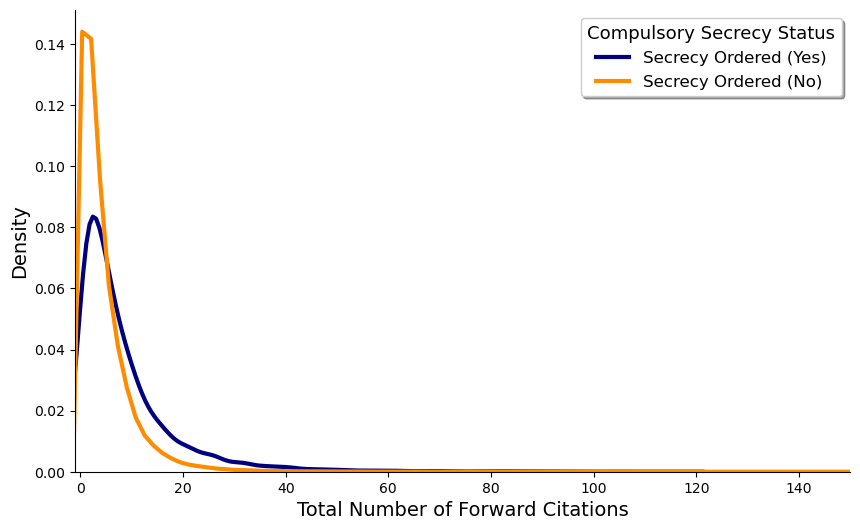

In [48]:
plt.figure(figsize=(10, 6))

sns.kdeplot(secret_patents, label='Secrecy Ordered (Yes)', linewidth=3, color='navy')
sns.kdeplot(non_secret_patents, label='Secrecy Ordered (No)', linewidth=3, color='darkorange')



plt.xlabel('Total Number of Forward Citations', fontsize=14)
plt.xlim(-1,150)
plt.ylabel('Density', fontsize=14)


plt.legend(title='Compulsory Secrecy Status', fontsize=12, title_fontsize=13, loc='upper right', frameon=True, shadow=True)

# Remove top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()
